## Sufyan Ahmad
## 201980013
## Assignment 02

###  This code imports the necessary libraries for working with computer vision and numerical computations. It's common to use OpenCV in combination with NumPy to handle and manipulate images and perform various image processing tasks.

In [2]:
import cv2
import numpy as np

### This code processes an input image using the Sobel operator to calculate the gradient magnitudes, which correspond to the strength of edges in the image. This technique is commonly used for edge detection and various other image processing tasks.

In [3]:
# Load the image paths
image_paths = ['/content/beach.jpg', '/content/lake.jpg', '/content/park.jpg', '/content/sea.jpg', '/content/tree.jpeg']

# Function to apply Sobel operator
def sobel_operator(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    gradient_x = np.zeros_like(image, dtype=np.float32)
    gradient_y = np.zeros_like(image, dtype=np.float32)

    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            gradient_x[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * sobel_x)
            gradient_y[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * sobel_y)

    gradient_magnitude = np.sqrt(np.square(gradient_x) + np.square(gradient_y))

    return gradient_magnitude


### This code processes an input image using the Laplacian operator to calculate the Laplacian gradients, which highlight regions of rapid intensity changes in the image. These regions often correspond to edges or transitions between different parts of the image. The computed Laplacian gradients can be useful for edge detection and various image analysis tasks.

In [4]:
# Function to apply Laplacian operator
def laplacian_operator(image):
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    laplacian = np.zeros_like(image, dtype=np.float32)

    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            laplacian[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * laplacian_kernel)

    return laplacian



### This code applies the Canny edge detection algorithm to an input image. It involves blurring the image to reduce noise, calculating the gradient in both the x and y directions, computing the gradient magnitudes, and finally normalizing the magnitudes. The output 'gradient_magnitude' represents the result of the Canny edge detection process and can be further used for thresholding and identifying edges in the image.

In [5]:
# Function to apply Canny edge detector
def canny_edge_detector(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    gradient_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=1)
    gradient_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=1)
    gradient_magnitude = np.sqrt(np.square(gradient_x) + np.square(gradient_y))
    gradient_magnitude /= np.max(gradient_magnitude)

    return gradient_magnitude

###  This code reads a set of grayscale images, applies three different edge detection methods to each image, and displays the original image along with the edges detected using Sobel, Laplacian, and Canny methods in a 2x2 grid of subplots for each image. This provides a side-by-side visualization of the effectiveness of each edge detection technique on different images.

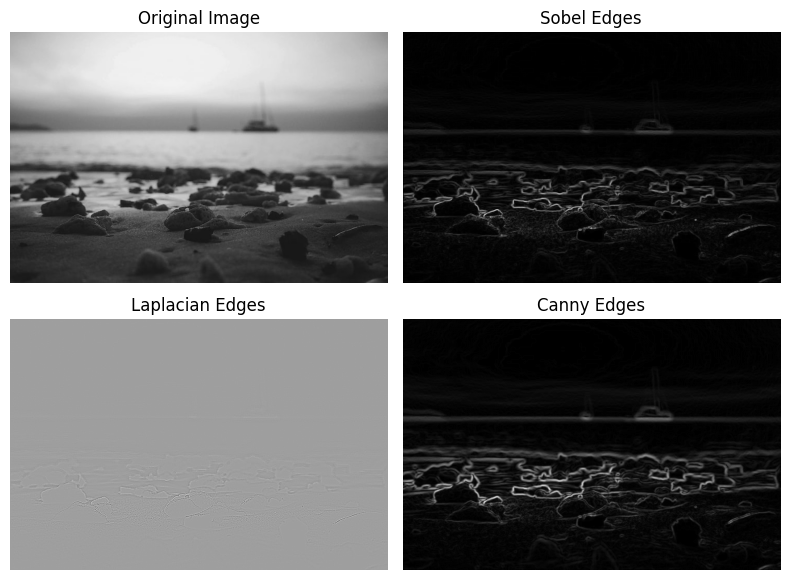

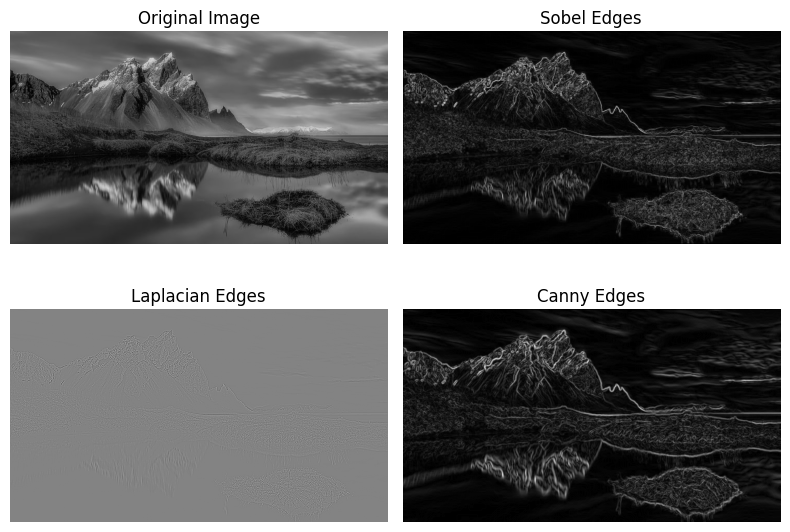

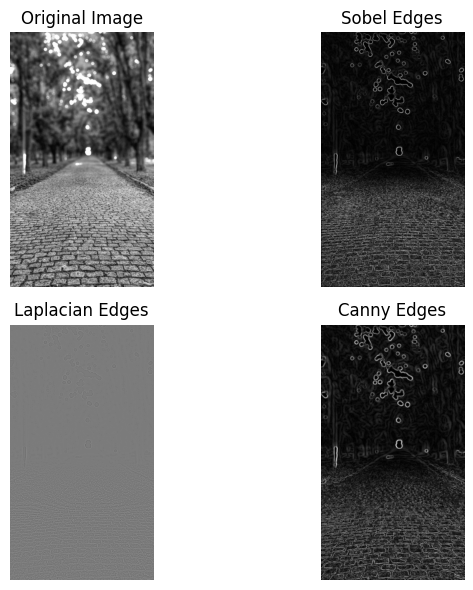

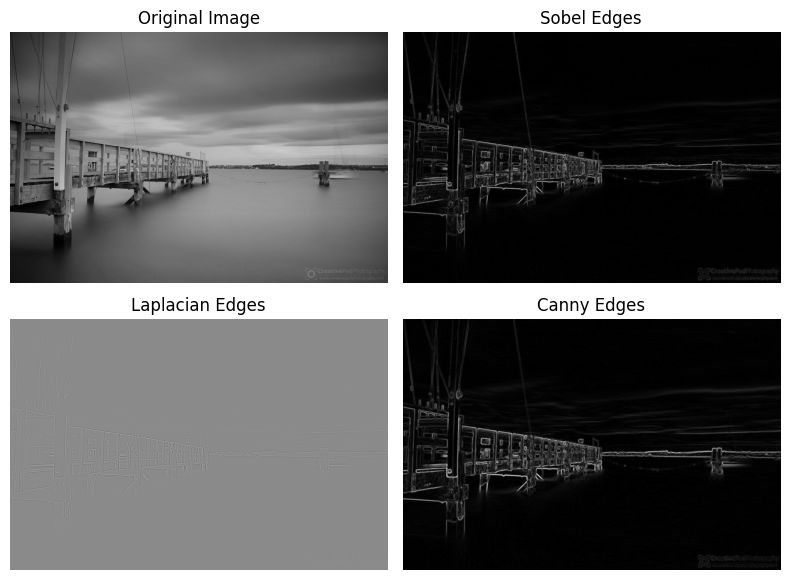

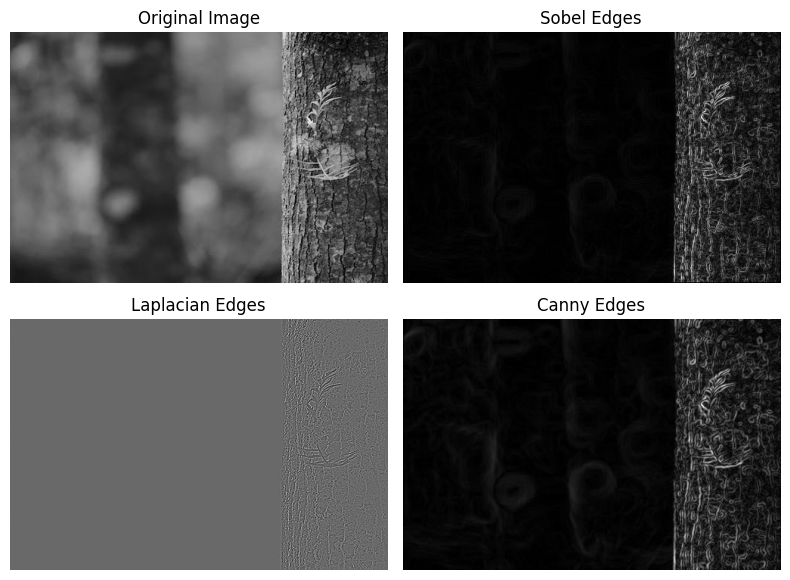

In [7]:

from matplotlib import pyplot as plt

# Load and process each image
for path in image_paths:

    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    sobel_edges = sobel_operator(image)
    laplacian_edges = laplacian_operator(image)
    canny_edges = canny_edge_detector(image)

    # Display the original image and the detected edges
    plt.figure(figsize=(8, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(sobel_edges, cmap='gray')
    plt.title("Sobel Edges")
    plt.axis("off")

    plt.subplot(2, 2, 3)
    plt.imshow(laplacian_edges, cmap='gray')
    plt.title("Laplacian Edges")
    plt.axis("off")

    plt.subplot(2, 2, 4)
    plt.imshow(canny_edges, cmap='gray')
    plt.title("Canny Edges")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
